# Install and import packages

In [ ]:
#install packages
!pip install -U -q PyDrive
!pip install -U pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import libraries
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import numpy as np
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
from pandasql import sqldf 
from pandas.core.frame import DataFrame
from pandas.core import series

In [ ]:
#function is used to run SQL 
mysql = lambda q: sqldf(q, globals())

# Authenticate and connect to google drive files

In [ ]:
# Authenticate google drive and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#import files from google drive locations
airline_link = 'https://drive.google.com/file/d/1ezCuARESRHSQW17pEvobc2Lupn7NlA5v/view?usp=sharing'

airport_link = 'https://drive.google.com/file/d/1r6qCF9o1O2kLoD41Ar2B58GnNAQnN7k0/view?usp=sharing'

flights_link = 'https://drive.google.com/file/d/1DY3IZpixvPz_eW_-lO5qjHCRWlfIBjOt/view?usp=sharing'

#isolate file id's of csv files on drive
airline_fid = airline_link.split('/')

airport_fid = airport_link.split('/')

flights_fid = flights_link.split('/')

airline_fid = airline_fid[5]

airport_fid = airport_fid[5]

flights_fid = flights_fid[5]


print('airline file id',airline_fid)
print('airport file id',airport_fid)
print('flights file id',flights_fid)

airline file id 1ezCuARESRHSQW17pEvobc2Lupn7NlA5v
airport file id 1r6qCF9o1O2kLoD41Ar2B58GnNAQnN7k0
flights file id 1DY3IZpixvPz_eW_-lO5qjHCRWlfIBjOt


# Import Data 

In [ ]:
#download sample data and read it in dataframes
downloaded = drive.CreateFile({'id':airline_fid}) 
downloaded.GetContentFile('airline.csv')  
airline_data = pd.read_csv('airline.csv')
#print(airline_data.describe)
print('\n')
downloaded = drive.CreateFile({'id':airport_fid}) 
downloaded.GetContentFile('airport.csv')  
airport_data = pd.read_csv('airport.csv')
#print(airport_data.describe)
print('\n')
downloaded = drive.CreateFile({'id':flights_fid}) 
downloaded.GetContentFile('flights.csv')  
flights_data = pd.read_csv('flights.csv')
flights_data_original=flights_data.copy(deep=True)
print(flights_data.shape)
#print(flights_data.describe)
print('\n')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(5819079, 31)




# Reload Data

In [ ]:
%%script echo skipping
flights_data=pd.DataFrame(columns=flights_data.columns)
flights_data=flights_data_original

skipping


# Clean Data

In [ ]:
# Check for unique values in data 
tmp=np.array([])
col_null=[]
for col in flights_data:
  print(col)
  print(flights_data[col].unique())
  tmp=pd.DataFrame(flights_data[col].unique())
  if(tmp.isnull().values.any()):
    col_null.append(col)

#print(col_null)

YEAR
[2015]
MONTH
[ 1  2  3  4  5  6  7  8  9 10 11 12]
DAY
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
DAY_OF_WEEK
[4 5 6 7 1 2 3]
AIRLINE
['AS' 'AA' 'US' 'DL' 'NK' 'UA' 'HA' 'B6' 'OO' 'EV' 'MQ' 'F9' 'WN' 'VX']
FLIGHT_NUMBER
[  98 2336  840 ... 6777 6895 6887]
TAIL_NUMBER
['N407AS' 'N3KUAA' 'N171US' ... 'N7LEAA' 'N850DN' 'N8676A']
ORIGIN_AIRPORT
['ANC' 'LAX' 'SFO' 'SEA' 'LAS' 'DEN' 'SLC' 'PDX' 'FAI' 'MSP' 'PHX' 'SJU'
 'PBG' 'IAG' 'PSE' 'BQN' 'ORD' 'GEG' 'HNL' 'ONT' 'MCO' 'BOS' 'HIB' 'ABR'
 'MAF' 'DFW' 'MKE' 'IAH' 'BNA' 'BRO' 'VPS' 'BOI' 'BJI' 'SGF' 'PHL' 'SBN'
 'RDD' 'EUG' 'IAD' 'BUF' 'PWM' 'JFK' 'CRP' 'PIA' 'FAT' 'SMF' 'AUS' 'MCI'
 'ATL' 'JAX' 'MFR' 'IDA' 'MSN' 'DCA' 'SAT' 'CHS' 'SBA' 'SMX' 'IND' 'CLE'
 'GSP' 'BDL' 'ABI' 'RIC' 'BFL' 'OMA' 'RDM' 'FLL' 'CID' 'TPA' 'SYR' 'ROC'
 'TYR' 'LAN' 'XNA' 'GSO' 'EWR' 'PBI' 'RSW' 'OAK' 'PVD' 'RNO' 'PIT' 'ABQ'
 'MIA' 'BWI' 'LGA' 'TUL' 'LIT' 'MSY' 'OKC' 'ATW' 'PNS' 'MEM' 'TYS' 'MHT'
 'SAV' 'CLT' 'G

In [ ]:
#check for all empty rows
airline_data.dropna(axis=0,how='all',inplace=True)
#print(airline_data.shape,'\n')

airport_data.dropna(axis=0,how='all',inplace=True)
#print(airport_data.shape,'\n')

flights_data.dropna(axis=0,how='all',inplace=True)
#print(flights_data.shape,'\n')


In [ ]:
#Drop data that has numerical values in ORIGIN_AIRPORT and DESTINATION_AIRPORT 
flights_data.query('ORIGIN_AIRPORT.str.isalpha() == True and DESTINATION_AIRPORT.str.isalpha() == True', inplace=True,engine='python')
print(flights_data.shape,'\n')
flights_data.query('ORIGIN_AIRPORT.str.len() == 3 and DESTINATION_AIRPORT.str.len() == 3', inplace=True,engine='python')
print(flights_data.shape,'\n')

(5332914, 31) 

(5332914, 31) 



In [ ]:
# Check if time of arrival and departure is between 0 and 2359
flights_data.query('ARRIVAL_TIME >= 0  and ARRIVAL_TIME <= 2359  or CANCELLED == 1', inplace=True,engine='python')
print(flights_data.shape,'\n')

flights_data.query('DEPARTURE_TIME >= 0  and DEPARTURE_TIME <= 2359 or CANCELLED == 1', inplace=True,engine='python')
print(flights_data.shape,'\n')

flights_data.query('SCHEDULED_ARRIVAL >= 0  and SCHEDULED_ARRIVAL <= 2359 or CANCELLED == 1', inplace=True,engine='python')
print(flights_data.shape,'\n')

flights_data.query('SCHEDULED_DEPARTURE >= 0  and SCHEDULED_DEPARTURE <= 2359 or CANCELLED == 1', inplace=True,engine='python')
print(flights_data.shape,'\n')


(5328105, 31) 

(5327632, 31) 

(5327631, 31) 

(5327631, 31) 



In [ ]:
# Drop duplicates
flights_data.duplicated(keep='first')
print(flights_data.shape,'\n')


(5327631, 31) 



In [ ]:
# Drop if any of the following YEAR,MONTH,DAY,DAY_OF_WEEK not present 
flights_data.dropna(subset=['YEAR','MONTH','DAY','DAY_OF_WEEK'],inplace=True)
print(flights_data.shape,'\n')

(5327631, 31) 



In [ ]:
%%script echo skipping
# Drop rows if no tail number is present 
flights_data.dropna(subset=['TAIL_NUMBER'],inplace=True)
print(flights_data.shape,'\n')
#skipped as cancelled don't have tail numbers

skipping


In [ ]:
flights_airport_data=pd.merge(flights_data,airport_data,how='left',left_on=['ORIGIN_AIRPORT'],right_on=['IATA_CODE'])
print(flights_airport_data.shape,'\n')
'''
for col in flights_airport_data:
  print(col)
  print(flights_airport_data[col])
#flights_data.loc[1:10]
'''

(5327631, 38) 



'\nfor col in flights_airport_data:\n  print(col)\n  print(flights_airport_data[col])\n#flights_data.loc[1:10]\n'

# Analyze data

In [ ]:
# Flights based of ORIGIN_AIRPORT
origin_flights=flights_data.value_counts(subset=['ORIGIN_AIRPORT'],ascending=True)
print(origin_flights.tail(10))

#Flights based of DEPARTURE_AIRPORT
departure_flights=flights_data.value_counts(subset=['DESTINATION_AIRPORT'],ascending=True)
print(departure_flights.tail(10))

#Flights based of DEPARTURE_AIRPORT
departure_flights=flights_data.value_counts(subset=['ORIGIN_AIRPORT','DESTINATION_AIRPORT'],ascending=True)
print(departure_flights.tail(10))


ORIGIN_AIRPORT
MSP               112055
LAS               133005
IAH               146477
PHX               146631
SFO               147807
LAX               194335
DEN               195768
DFW               239241
ORD               285512
ATL               346465
dtype: int64
DESTINATION_AIRPORT
MSP                    112059
LAS                    133110
IAH                    146582
PHX                    146741
SFO                    147873
LAX                    194587
DEN                    195893
DFW                    239432
ORD                    285710
ATL                    346794
dtype: int64
ORIGIN_AIRPORT  DESTINATION_AIRPORT
JFK             SFO                     8420
SFO             JFK                     8425
ORD             LGA                     9536
LAX             LAS                     9581
LGA             ORD                     9631
LAS             LAX                     9711
LAX             JFK                    11989
JFK             LAX                   

DAY_OF_WEEK
1    798251
2    780161
3    790225
4    788736
5    779120
6    637180
7    753958
Name: DAY_OF_WEEK, dtype: int64 ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
MONTH
1     469489
2     428712
3     503800
4     484711
5     496489
6     503308
7     520244
8     510085
9     464701
11    467514
12    478578
Name: YEAR, dtype: int64


Text(0.5, 1.0, 'flight count based on month')

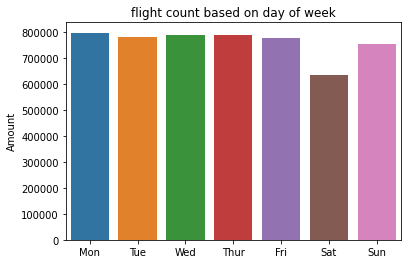

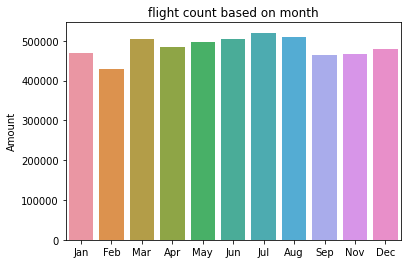

In [ ]:
#Flights based of days of the week
plt.figure(1)
day_of_week=flights_data.groupby(['DAY_OF_WEEK'])['DAY_OF_WEEK'].count()
labels=['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
print(day_of_week,labels)
sns.barplot(x=labels ,y=day_of_week.values)
plt.ylabel('Amount')
plt.title('flight count based on day of week')

plt.figure(2)
#Flights based of months
month=flights_data.groupby(['MONTH'])['YEAR'].count()
print(month)
labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#Month has data for october missing
label_index=month.index.array-1
labels=np.take(labels,label_index)
#print(label_index,labels)
sns.barplot(x=labels,y=month.values)
plt.ylabel('Amount')
plt.title('flight count based on month')

CANCELLATION_REASON
A    24309
B    47874
C    15225
D       22
Name: YEAR, dtype: int64


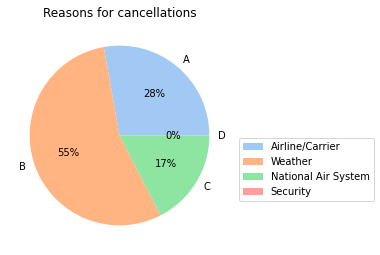

In [ ]:
#Cancelled flights
cancelled_flights = flights_data.query('CANCELLED == 1',engine='python')
reason_cancelled_flights=cancelled_flights.groupby(['CANCELLATION_REASON'])['YEAR'].count()
print(reason_cancelled_flights)
colors= sns.color_palette('pastel')[0:5]
plt.title('Reasons for cancellations')
labels=['Airline/Carrier','Weather','National Air System','Security']
plt.pie(reason_cancelled_flights,labels=reason_cancelled_flights.index,colors=colors,autopct='%.0f%%')
plt.legend(labels,bbox_to_anchor=(1,0.5),loc='upper right', bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.80)

In [ ]:
#Delays at arrival 
arrival_d=flights_data.query('ARRIVAL_DELAY > 14 and ARRIVAL_DELAY != "" ',engine='python')
#print(arrival_d.head(5))
arrival_delay=arrival_d.groupby(['DESTINATION_AIRPORT'])[['ARRIVAL_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']].mean()
arrival_delay.sort_values(by=['ARRIVAL_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'], ascending=False,inplace=True)
print('Arrival Delay\'s')
print(arrival_delay['ARRIVAL_DELAY'].head(5))
arrival_delay=arrival_delay.iloc[:,1:]
#remove arrival delay column for pie chart
print(arrival_delay.head(5))

#delays at departure
departure_d=flights_data.query('DEPARTURE_DELAY !=""',engine='python')
departure_delay=departure_d.groupby(['ORIGIN_AIRPORT'])[['DEPARTURE_DELAY']].mean()
departure_delay.sort_values(by=['DEPARTURE_DELAY'], ascending=False,inplace=True)
print('Departure Delay\'s')
print(departure_delay.head(5))

Arrival Delay's
DESTINATION_AIRPORT
BRD    81.844444
PPG    81.000000
ILG    78.100000
PLN    77.932773
TTN    77.479434
Name: ARRIVAL_DELAY, dtype: float64
                     AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
DESTINATION_AIRPORT                                                    
BRD                          9.666667             0.0      44.155556   
PPG                          0.000000             0.0      81.000000   
ILG                         25.766667             0.0      19.333333   
PLN                          6.949580             0.0      25.310924   
TTN                         21.597686             0.0      13.304627   

                     LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
DESTINATION_AIRPORT                                      
BRD                            28.022222       0.000000  
PPG                             0.000000       0.000000  
ILG                            33.000000       0.000000  
PLN                            45.210084       0

In [ ]:
params=arrival_delay.index.values
print(params)
x=airport_data.query('IATA_CODE == @params')['AIRPORT'].values
print(x)

['BRD' 'PPG' 'ILG' 'PLN' 'TTN' 'EYW' 'APN' 'MQT' 'EGE' 'BJI' 'ESC' 'JFK'
 'ORD' 'MEI' 'DFW' 'SBN' 'OTH' 'EWR' 'COU' 'CHO' 'CIU' 'ATL' 'RHI' 'ACT'
 'BGM' 'ALO' 'JAC' 'LBE' 'BTV' 'DTW' 'EKO' 'CEC' 'CMI' 'IAH' 'MDT' 'LGA'
 'CWA' 'CAK' 'ACK' 'SFO' 'GUM' 'PIB' 'AVL' 'STC' 'CLE' 'ACY' 'CAE' 'HYA'
 'SWF' 'LWS' 'GSO' 'HPN' 'IAD' 'TYS' 'MKG' 'JLN' 'RST' 'DEN' 'OAJ' 'EAU'
 'MYR' 'GRB' 'LAN' 'GRI' 'COS' 'RIC' 'MIA' 'GTR' 'TLH' 'MHK' 'STT' 'SPI'
 'DVL' 'ACV' 'SHV' 'DLH' 'BOS' 'FWA' 'PAH' 'MFE' 'PWM' 'BTR' 'MLU' 'LAW'
 'HIB' 'MCO' 'FAY' 'ISP' 'DSM' 'LAR' 'CVG' 'PSG' 'ASE' 'MSP' 'CRW' 'FAR'
 'TVC' 'BFL' 'ERI' 'SYR' 'EVV' 'PBI' 'TPA' 'FAT' 'LSE' 'FNT' 'CID' 'IAG'
 'DAY' 'AZO' 'SLC' 'SGF' 'JMS' 'HDN' 'SCE' 'AUS' 'BQK' 'DBQ' 'HSV' 'ROA'
 'GRR' 'BMI' 'ROC' 'TOL' 'FLL' 'SUX' 'MFR' 'BDL' 'BPT' 'SAV' 'PHL' 'GRK'
 'FSD' 'IND' 'MSN' 'MHT' 'LNK' 'FSM' 'BUF' 'XNA' 'MVY' 'LEX' 'ABE' 'PVD'
 'WRG' 'ELM' 'TYR' 'VPS' 'CSG' 'IMT' 'CHA' 'EUG' 'BRO' 'PIT' 'MBS' 'MKE'
 'RSW' 'FLG' 'MMH' 'CLD' 'ILM' 'MSY' 'BZN' 'MDW' 'C

Brainerd Lakes Regional Airport has maximum average delay 
 


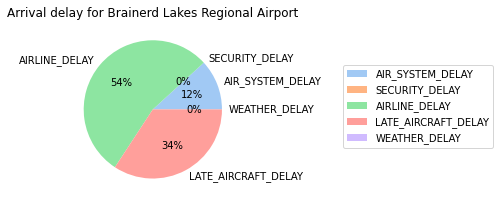

In [ ]:
colors=colors = sns.color_palette('pastel')[0:5]
#get airport name form airport data frame
airport_name=airport_data.query('IATA_CODE == @arrival_delay.index.values[0]')['AIRPORT'].values
title='Arrival delay for '+ airport_name[0]
print(airport_name[0]+ ' has maximum average delay \n ')
plt.title(title)
labels=['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']
plt.pie(arrival_delay.iloc[0],labels=labels,colors=colors,autopct='%.0f%%')
plt.legend(labels,bbox_to_anchor=(1,0.5),loc='center right', bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.40)

In [ ]:
#filter data for LAX from Friday evening to sunday night
